In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils import data

In [2]:
trans = transforms.ToTensor()
batch_size = 256
num_workers = 4

In [3]:
train_data = torchvision.datasets.FashionMNIST("../data", train=True, transform=trans, download=False)
test_data = torchvision.datasets.FashionMNIST("../data", train=False, transform=trans, download=False)

data的每一项是一个元组，（data， label）
注意：在创建dataset的时候，最好是(total_data, total_label)的元组形式，然后解包放入dataloader中，最终dataloader的每一个数据就是(single_data, single_label)的元组形式

In [4]:
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 9)

In [5]:
train_loader = data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [6]:
for X, y in test_loader:
    print(X.shape)

torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([256, 1, 28, 28])
torch.Size([25

In [7]:
import matplotlib.pyplot as plt
def get_labels(y):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    labels = [text_labels[int(i)] for i in y]
    return labels

def show_figure(imgs, num_row, num_col, title=None, scale=1.5):
    figsize = (num_col* scale, num_row* scale)
    fig, axes = plt.subplots(nrows=num_row, ncols=num_col, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if isinstance(img, torch.Tensor):
            ax.imshow(img.numpy().squeeze())
        else:
            ax.imshow(img)
        if title:
            ax.set_title(title[i])
        ax.axis('off')
    return axes

画图的心得：  
首先想到如果是绘制子图，就想到两个点，一个是用subplots，还有就是要想到在绘制的时候，需要用到axes（这个是一个list）  
在使用axes的一个小技巧就是，如果不想使用两层for循环，一个好的技巧就是将axes进行flatten  
绘图用的就是ax.imshow,要注意tensor转化为numpy  
需要注意的一个点是，在设置figsize的时候，长方形的长应该是列的数量乘以scale，宽类似

array([<Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'bag'}>, <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'dress'}>], dtype=object)

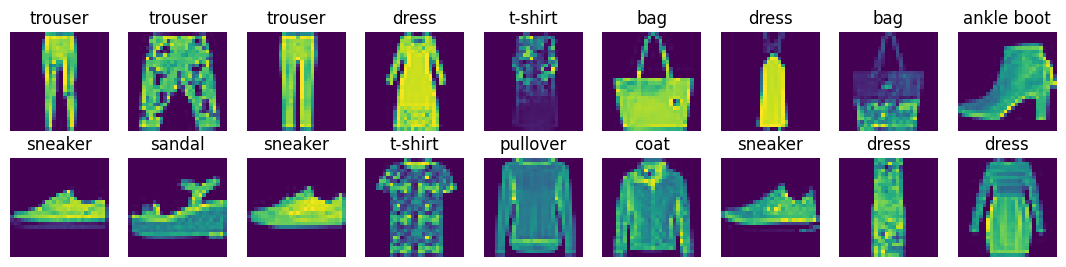

In [8]:
X, y = next(iter(train_loader))
X = X[:18, :, :, :]
y = y[:18]
titles = get_labels(y)
show_figure(X, num_row=2, num_col=9, title=titles)

In [9]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [10]:
loss = nn.CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss(reduce="None")
optimer = torch.optim.Adam(net.parameters(), lr=0.1)

/opt/anaconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# from IPython.display import display, clear_output

# class Animator:
#     """在动画中绘制数据"""
#     def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
#                  ylim=None, xscale='linear', yscale='linear',
#                  fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
#                  figsize=(3.5, 2.5)):
        
#         self.X = self.Y = None
#         self.fmts = fmts
#         # 增量地绘制多条线
#         if legend is None:
#             legend = []
#         self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
#         if nrows * ncols == 1:
#             self.axes = [self.axes, ]
#         # 使用lambda函数捕获参数
    
#         self.config_axes = lambda: self.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
#     def set_axes(self, ax, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
#         """手动设置坐标轴"""
#         ax.set_xlabel(xlabel)
#         ax.set_ylabel(ylabel)
#         ax.set_xscale(xscale)
#         ax.set_yscale(yscale)
#         if xlim: ax.set_xlim(xlim)
#         if ylim: ax.set_ylim(ylim)
#         if legend: ax.legend(legend)

#     def add(self, x, y):
#         # 向图表中添加多个数据点
#         if not hasattr(y, "__len__"):
#             y = [y]
#         n = len(y)
#         if not hasattr(x, "__len__"):
#             x = [x] * n
#         if not self.X:
#             self.X = [[] for _ in range(n)]
#         if not self.Y:
#             self.Y = [[] for _ in range(n)]
#         for i, (a, b) in enumerate(zip(x, y)):
#             if a is not None and b is not None:
#                 self.X[i].append(a)
#                 self.Y[i].append(b)
#         self.axes[0].cla()
#         print(self.X, self.Y)
#         for x, y, fmt in zip(self.X, self.Y, self.fmts):
#             self.axes[0].plot(x, y, fmt)
#         self.config_axes()
#         # clear_output(wait=True)
#         display(self.fig)

In [12]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), figsize=(10, 4)):
        
        self.X = self.Y = None
        self.fmts = fmts
        if legend is None:
            legend = []
        
        # 创建两个子图，第一个用于 loss，第二个用于其他数据
        self.fig, self.axes = plt.subplots(1, 2, figsize=figsize, sharex=True)
        
        self.config_axes_loss = lambda: self.set_axes(self.axes[0], xlabel, "Loss", xlim, None, xscale, yscale, [legend[0]])
        self.config_axes_main = lambda: self.set_axes(self.axes[1], xlabel, ylabel, xlim, ylim, xscale, yscale, legend[1:])
    
    def set_axes(self, ax, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        """手动设置坐标轴"""
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        if xlim: ax.set_xlim(xlim)
        if ylim: ax.set_ylim(ylim)
        if legend: ax.legend(legend)

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if self.X is None:
            self.X = [[] for _ in range(n)]
        if self.Y is None:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        
        self.axes[0].cla()  
        self.axes[1].cla()  
        
        # 绘制 loss (单独的曲线)
        self.axes[0].plot(self.X[0], self.Y[0], self.fmts[0], label="Loss")
        self.config_axes_loss()
        
        # 绘制其余数据
        for x, y, fmt in zip(self.X[1:], self.Y[1:], self.fmts[1:]):
            self.axes[1].plot(x, y, fmt)
        self.config_axes_main()
        
        display(self.fig)


In [ ]:
from tqdm import tqdm

def train(train_loader, test_loader, epoches, loss, optimer): 
    log = {"epoch":[], "loss":[], "train_acc":[], "test_acc":[]}

    animator = Animator(xlabel='epoch', xlim=[1, epoches], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])

    for epoch in tqdm(range(epoches)):
        total_loss = 0
        train_true = train_num = 0
        for i, (X, y) in enumerate(train_loader):
            y_hat = net(X)
            l = loss(y_hat, y)
            optimer.zero_grad()
            l.mean().backward()
            optimer.step()
            total_loss += l.sum().item()
            train_num += len(y)
            train_true += (y==y_hat.argmax(axis=1)).sum().item()
        train_acc = train_true * 100 / train_num
        mean_loss = total_loss / len(y)
        log["train_acc"].append(train_acc)
        
        with torch.no_grad():
            total_num = true_num = 0
            for i, (X, y) in enumerate(test_loader):
                y_hat = net(X)
                y_hat = y_hat.argmax(dim=1)
                total_num += len(y)
                true_num += (y_hat == y).sum().item()
            test_acc = true_num*100/total_num
            log["test_acc"].append(test_acc)
        log["epoch"].append(epoch)
        log["loss"].append(total_loss)
        
        print(f"epoch: {epoch}")
        print(f"loss: {total_loss}")
        print(f"acc: {true_num*100/total_num:.2f}")
        animator.add(epoch + 1, (mean_loss, train_acc/100, test_acc/100))
    return log

注意：CrossEntropyLoss中就已经自带了softmax，所以不需要再额外添加softmax了  
这个total_loss在加的时候记得用l.item，因为loss返回的并不是一个纯粹的数字，为了得到纯粹的数字，需要用item（返回float）  
算相同label的一个好方法就是用(y_hat == y).sum().item()

  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 0
loss: 321.8405500650406
acc: 77.94


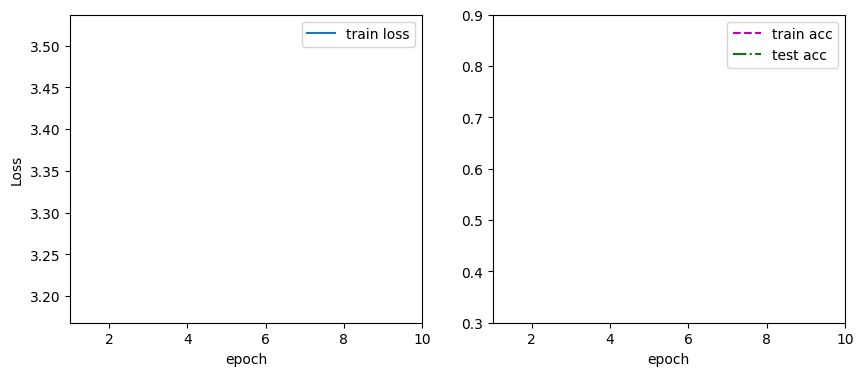

 10%|█         | 1/10 [00:04<00:36,  4.11s/it]

epoch: 1
loss: 211.31590920686722
acc: 81.13


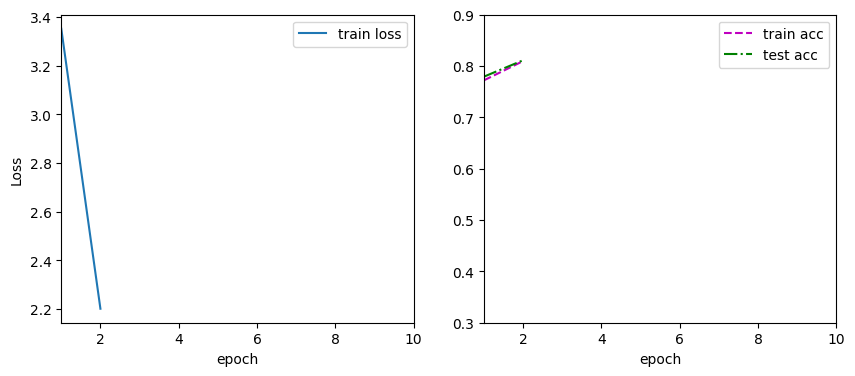

 20%|██        | 2/10 [00:08<00:32,  4.09s/it]

epoch: 2
loss: 217.1025720834732
acc: 73.74


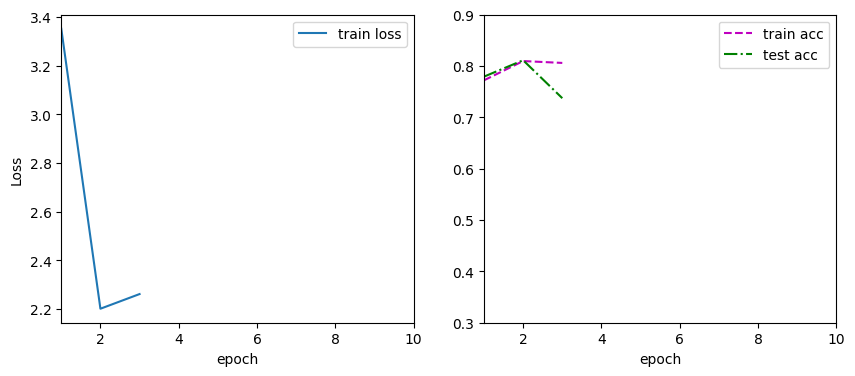

 30%|███       | 3/10 [00:12<00:28,  4.06s/it]

epoch: 3
loss: 227.02340590953827
acc: 83.44


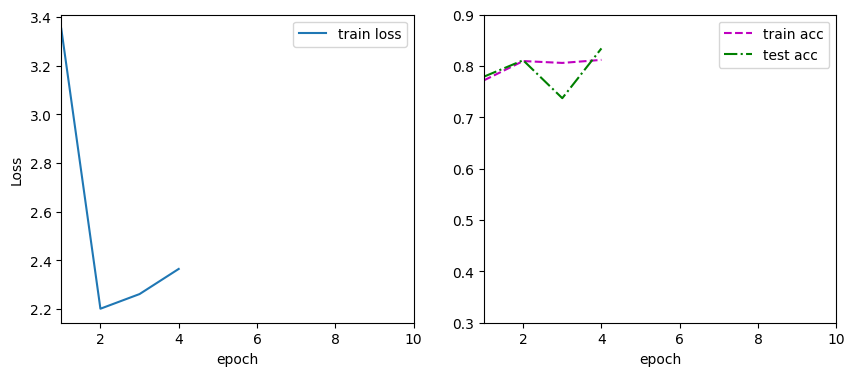

 40%|████      | 4/10 [00:16<00:24,  4.04s/it]

epoch: 4
loss: 213.43615275621414
acc: 80.89


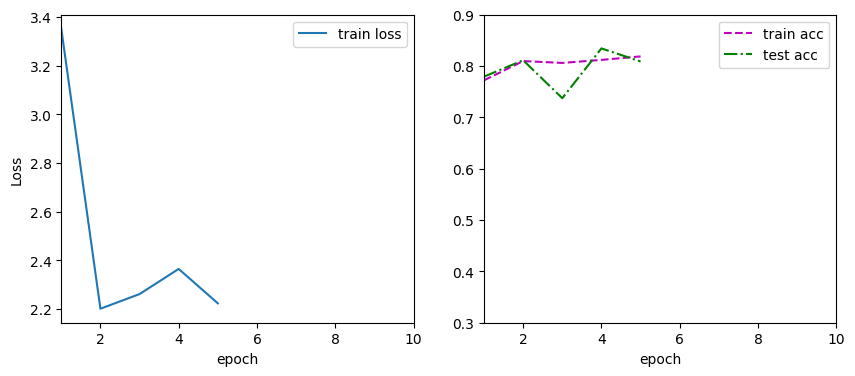

 50%|█████     | 5/10 [00:20<00:20,  4.03s/it]

epoch: 5
loss: 227.00137540698051
acc: 77.08


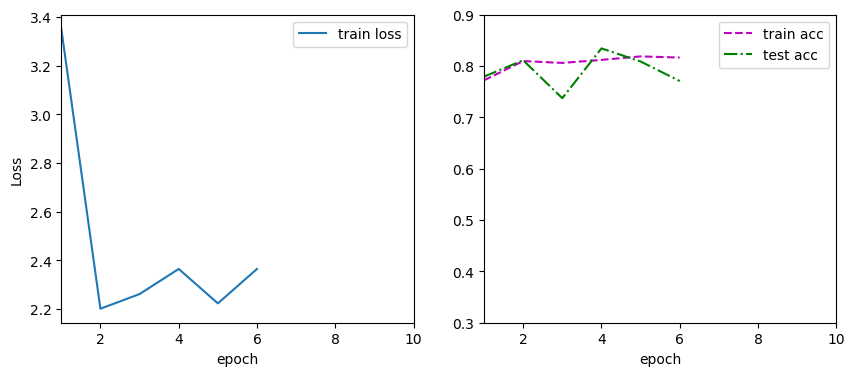

 60%|██████    | 6/10 [00:24<00:16,  4.02s/it]

epoch: 6
loss: 237.3854264318943
acc: 79.88


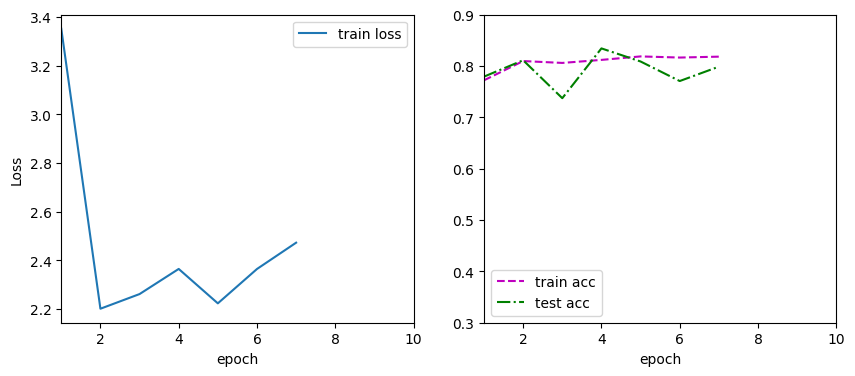

 70%|███████   | 7/10 [00:28<00:12,  4.01s/it]

epoch: 7
loss: 233.67408654093742
acc: 81.74


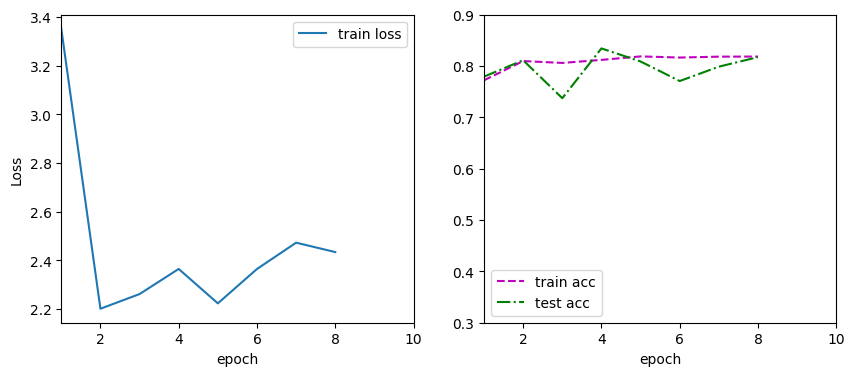

 80%|████████  | 8/10 [00:32<00:08,  4.04s/it]

epoch: 8
loss: 232.20969739556313
acc: 81.90


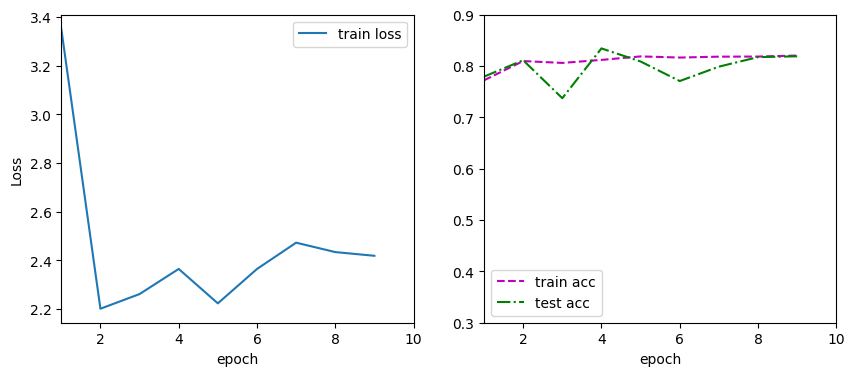

 90%|█████████ | 9/10 [00:36<00:04,  4.06s/it]

epoch: 9
loss: 217.0408162176609
acc: 78.22


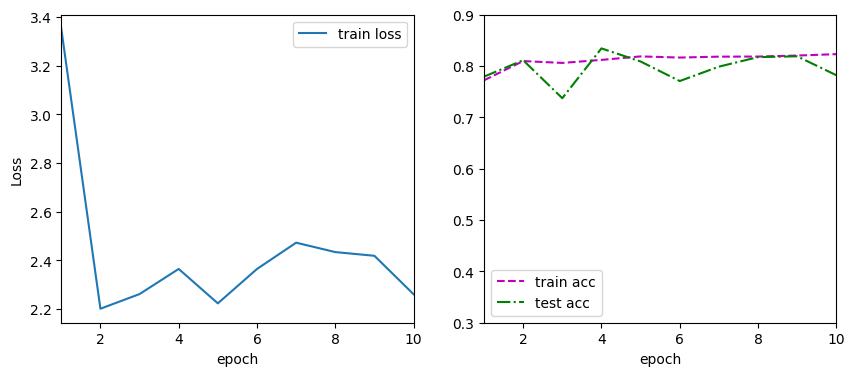

100%|██████████| 10/10 [00:40<00:00,  4.06s/it]


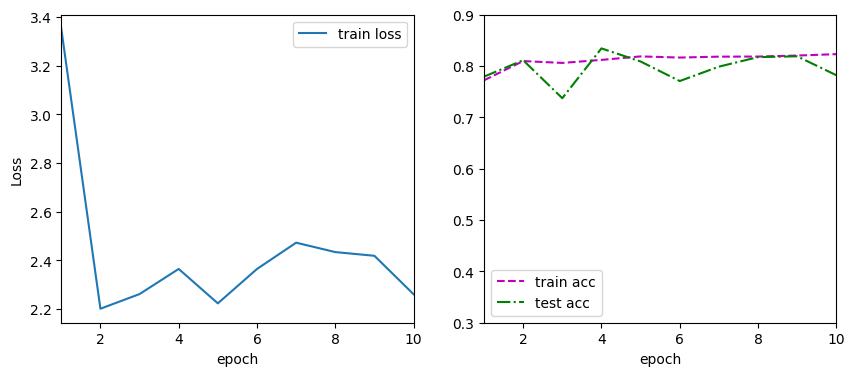

In [14]:
epoches = 10
logs = train(train_loader, test_loader, epoches, loss_fn, optimer)

In [15]:
logs

{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'loss': [321.8405500650406,
  211.31590920686722,
  217.1025720834732,
  227.02340590953827,
  213.43615275621414,
  227.00137540698051,
  237.3854264318943,
  233.67408654093742,
  232.20969739556313,
  217.0408162176609],
 'train_acc': [77.225,
  77.94,
  80.97333333333333,
  81.13,
  80.61,
  73.74,
  81.2,
  83.44,
  81.87833333333333,
  80.89,
  81.65666666666667,
  77.08,
  81.83166666666666,
  79.88,
  81.84833333333333,
  81.74,
  82.045,
  81.9,
  82.32,
  78.22],
 'test_acc': []}

这一段主要学习这个animation还有图像展示的东西，也就是plt的相关内容